In [37]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [39]:
#Load data from the merged_clean_ver2.csv file.
data = pd.read_csv('merged_clean_ver2.csv')
data

,Unnamed: 0,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d,ic2_
0,0,44060,FL,Male,1158.437751,392,430.0,466,520.0,21975.0,28.000000,100.0,Moderate
1,1,96093,IL,Male,537.000000,365,415.0,410,473.0,19387.0,5.666667,7.0,Moderate
2,2,43333,FL,Female,725.000000,301,340.0,361,436.0,18837.0,4.111111,5.0,Low
3,3,21885,NC,Male,1158.437751,401,407.0,399,413.0,14014.0,27.277778,38.0,Moderate
4,4,190108,FL,Female,995.000000,252,280.0,316,348.0,17991.0,6.000000,5.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,3988,66762,MI,Female,632.000000,279,336.0,339,388.0,12653.0,8.533333,5.0,Low
3989,3989,6443,FL,Male,595.000000,252,263.0,262,274.0,11132.0,14.692308,20.0,Low
3990,3990,151175,CA,Female,2707.000000,507,504.0,538,537.0,16165.0,12.117647,22.0,Moderate
3991,3991,151504,CA,Male,2666.000000,535,609.0,612,653.0,24745.0,12.333333,21.0,Moderate


In [40]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d,ic2_
0,44060,FL,Male,1158.437751,392,430.0,466,520.0,21975.0,28.000000,100.0,Moderate
1,96093,IL,Male,537.000000,365,415.0,410,473.0,19387.0,5.666667,7.0,Moderate
2,43333,FL,Female,725.000000,301,340.0,361,436.0,18837.0,4.111111,5.0,Low
3,21885,NC,Male,1158.437751,401,407.0,399,413.0,14014.0,27.277778,38.0,Moderate
4,190108,FL,Female,995.000000,252,280.0,316,348.0,17991.0,6.000000,5.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
3988,66762,MI,Female,632.000000,279,336.0,339,388.0,12653.0,8.533333,5.0,Low
3989,6443,FL,Male,595.000000,252,263.0,262,274.0,11132.0,14.692308,20.0,Low
3990,151175,CA,Female,2707.000000,507,504.0,538,537.0,16165.0,12.117647,22.0,Moderate
3991,151504,CA,Male,2666.000000,535,609.0,612,653.0,24745.0,12.333333,21.0,Moderate


In [41]:
data.describe()

,id,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
count,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000
mean,98929.308039,1158.437751,351.622840,400.713248,399.876283,444.732031,16456.413724,11.785117,15.665036
std,58179.839090,1033.485773,168.488445,180.568500,164.822741,175.004178,9455.318118,10.172672,12.703041
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260870,1.000000
25%,46153.000000,548.000000,239.000000,284.000000,287.000000,325.000000,11136.000000,7.187500,10.000000
50%,101432.000000,803.000000,318.000000,366.000000,365.000000,410.000000,14356.000000,10.000000,14.000000
75%,151653.000000,1349.000000,425.000000,478.000000,480.000000,528.000000,18780.000000,14.428571,20.000000
max,191779.000000,5982.000000,1500.000000,1500.000000,1311.000000,1331.000000,174523.000000,450.000000,200.000000


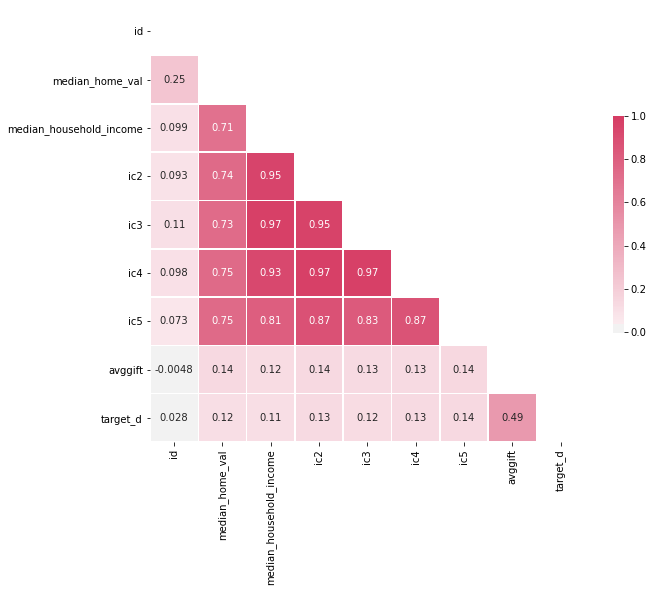

In [53]:
# Plot Pearson Correlation Heatmap.
f, ax = plt.subplots(figsize=(10, 8))
mat = data.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(2000, 2, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

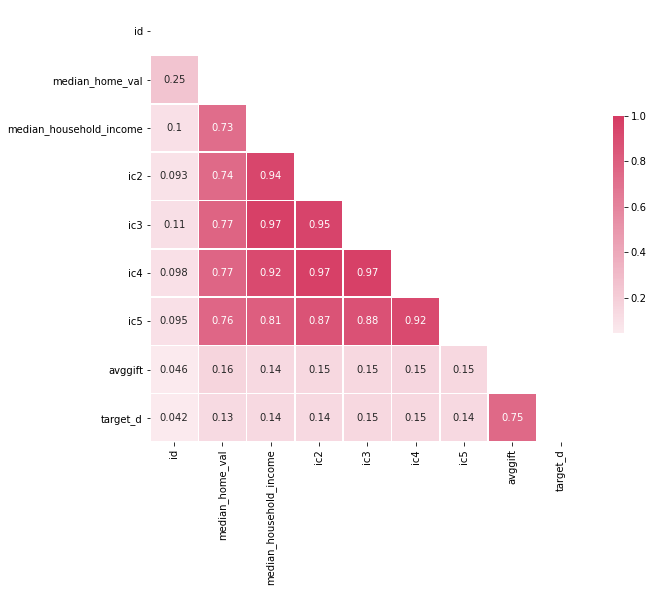

In [56]:
#Plot Spearman Correlation Heatmap.
f, ax = plt.subplots(figsize=(10, 8))
mat = data.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(2000, 2, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

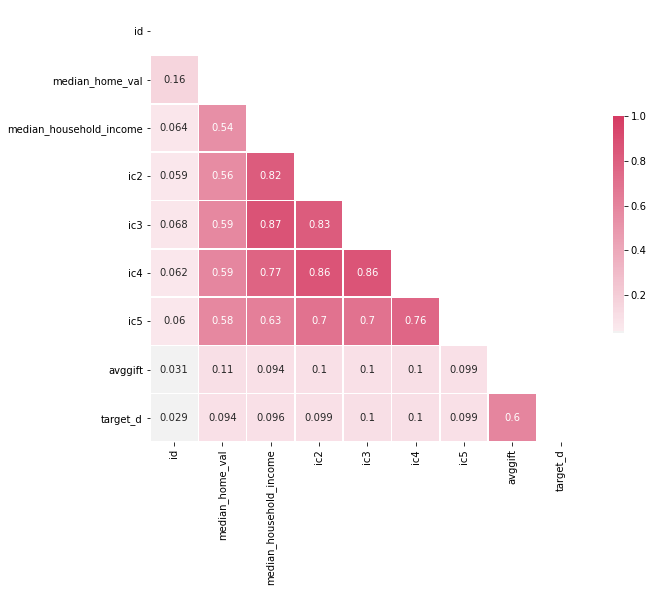

In [54]:
#Plot Kendall Correlation Heatmap.
f, ax = plt.subplots(figsize=(10, 8))
mat = data.corr('kendall')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(2000, 2, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()